# Group Project Exercise Sheet

Group 8: Larisa Darolti, Pascal Schneider, Ruoyi Cui

Welcome to the lovely home of your group project for this years' *Statistical Learning in Atmospheric and Climate Sciences* Lecture. This is the place where you find all information regarding your group project, and also the place to work on your group project. You will submit a copy of this file in the end.

## Project description

You are working in groups of 2-3 people. Each group will get assigned, at random, a dataset and a method that was discussed during the lecture. The datasets are coming from the Atmospheric and Climate Sciences, and are both taken from real-world research problems. Your task is to use the two methods you were assigned (one linear and one nonlinear statistical learning method) to fit and predict from the dataset you have been given. For the prediction, you will be given a part of the dataset consisting only of predictors but with target values omitted. For comparing your methods, you will also fit a multiple linear regression model (without any regularisation) to the dataset.

The methods you have been assigned may or may not be suitable one for the dataset. However, the final performance of your code, that is the precision of your prediction, is not important. The key goal is to show that 

1. you understand the theoretical background of what a specific method is doing or attempts to do;
2. you are aware of the strengths and limitations of a given method applied to a concrete atmospheric science problem;
3. you are able to correctly apply the method in a training/testing context (e.g., cross-validation, hyperparameter selection, etc.);
4. you are able to interpret the results of your method application to the atmospheric science problem.

Below we have already constructed a framework that helps you through data reading and preparation, gives you space for model fitting and prediction and in the end asks you the questions you need to work on. So you just need to work along the framework and make sure you carefully answer each question, and then you can hand in!

## Method and Data

The pool of methods consists of

| Method | R packages |
| :- | :- |
| Ridge Regression | `glmnet` |
| Lasso Regression | `glmnet` |
| Random Forest | `randomForest` |
| Boosted Trees | `gbm` |
| Neural Net | `nnets` |

you can only use the listed packages, since no additional packages are installed on the server.

And this is the dataset you'll be working with:

2. **Estimation of the state of forced climate change from annual temperature maps** <br>
Internal atmospheric variability affects the climate system at all temporal and spatial scales. Therefore, detecting externally forced climate change from maps of (for example) annual temperatures is not straightforward. In fact, there will be always inescapable uncertainty around how much a certain climate state is made up of internal variability and externally forced change, as we only observe a combination of the two.

    The goal of the present project is to estimate two target metrics that describe the state of externally forced climate from global annual temperature maps, using statistical learning methods. The two target metrics are the forced global mean temperature response ($F_T$), in °C, a vector of length $n$ equal to the number of training samples), and the year from which a certain annual temperature map comes from ($F_Y$). This type of statistical learning based climate change detection is indeed used in current climate research (see Barnes et al. 2019; Sippel et al. 2020 for a more detailed description of this idea). We’ll estimate both metrics from annual global temperature maps ($X$), matrices of $n$ $x$ $p$, where $n$ is the number of training samples, and $p$ is the number of grid cell predictors, here $p=2592$). Hence, our goal is to estimate a function $f$ in order to derive a prediction $\hat{F}$ using a relationship of the form $F=f(X)+ \epsilon$.

    For this project, we will make use of an ensemble of climate model simulations. Our ensemble is made up of seven different climate models ("CanESM2", "CESM1-CAM5", "CSIRO-Mk3-6-0", "EC-EARTH", "GFDL-CM3", "GFDL-ESM2M", "MPI-ESM"), and each climate model contains ten simulations up to the year 2030 that we can use for training our statistical learning model. In the case of these model simulations (and in contrast to observed climate data), we know metrics of forced climate change ($F_T$, $F_Y$), because the ensemble average across a large number of simulations reveals forced (=systematic) changes, whereas individual members show (partly large) internal variability on top of a systematic forced change.

    A simple illustration for a prediction based on a few (20) randomly selected grid cells using a multiple linear regression is shown in the script to get you started, along with a number of reasonable visualizations of the dataset. For a successful application, you will train, compare, and interpret (a) a linear and (b) a nonlinear method in order to predict $F_T$ and $F_Y$. In particular for the nonlinear methods, you won’t be able to train your model with all $p=2592$ possible predictors, so you need to do some feature selection. 
    You will receive a number of simulated data Xtrain (but without knowing the forced metrics ($F_T$, $F_Y$), for which you will generate a prediction.

    References:
    
    Barnes, E.A., Hurrell, J.W., Ebert‐Uphoff, I., Anderson, C. and Anderson, D., 2019. Viewing forced climate patterns through an AI Lens. Geophysical Research Letters, 46(22), pp.13389-13398.
 
    Sippel, S., Meinshausen, N., Fischer, E.M., Székely, E. and Knutti, R., 2020. Climate change now detectable from any single day of weather at global scale. Nature Climate Change, 10(1), pp.35-41.

## Help

Please use our moodle forum if you need help. For help on the specific methods or implementation choices, check the specific exercises (all methods have been part of the Exercises), or use the R help (e.g., `?randomForest`).

## IMPORTANT: A note on parallel working on a shared resource

Please note that any one of your group is writing to the same notebook, even if it looks like it is saved in your home directory. That means that **group members cannot work on the notebook at the same time**. Make sure to talk to each other before opening the notebook in your hub. Disregarding this advice might lead to loss of data!

All groups are sharing the same server resources. Please be considerate of your fellow students and do not overload the server. Some methods can be very expensive (i.e. taking long and needing a lot of resources) if the hyperparameters are set to allow the model to grow large. It is ok to use a less precise, less expensive model in your final solution. It is what scientists do all the time. If you need to do that, make sure to discuss this decisions in the evaluation section.

## Preprocessing P2: Estimation of the state of forced climate change from annual temperature maps

Below you will find the code that loads and preprocesses your data. Select the dataset you have been assigned to. If you have executed the code, you will end up with data in a tabular manner (rows: datapoints, columns: variables = features). Now it's your turn! Define the predictand and the predictor table. We have already done some feature engineering, i.e. added some features to the table that we think might be valuable for the prediction. However, you can choose how many features (one, some or all) for your model as you like. We suggest you play around a bit with it to understand what your model is doing. 

Load libraries and custom functions.

In [58]:
########################################################################
## 0.a. required packages
########################################################################

library(raster)
library(RColorBrewer)
library(rworldmap)
library(ncdf4)
library(tidyverse)

# Define colours for plotting:
col.seq = rev(colorRampPalette(brewer.pal(n = 11, name = "RdBu"))(99))
col = rev(colorRampPalette(brewer.pal(n = 9, name = "YlOrRd"))(99))


########################################################################
## 0.b. Functions.
########################################################################
MSE <- function(obs, sim) { mean( ( obs - sim ) ^ 2 ) }

# write any other function you may want here...
getwd()

[1] "/teaching/2021_HS/SLAC/Projects/Group8"

Load .RData files, and inspect the files.

In [59]:
########################################################################
## 0.c. Load data
########################################################################
load("data_Project2/Project2_data.Rdata")

########################################################################
## 0.d. Inspect the data
########################################################################

str(LENS_tas_ann_train$X)
# LENS_tas_ann_train$X :  A n x p matrix that contains the number of samples n (n = 9100), and the number of grid cells as potential predictors p (p = 2592) for the training data.

str(LENS_tas_ann_train$Y)
# LENS_tas_ann_train$Y : A data frame that contains 
# 1. fraw (target variable 1: the global mean forced temperature response in [°C], i.e. the state of externally forced climate change in °C)
# 2. year (target variable 2: the year for which the simulation was generated).

str(LENS_tas_ann_train$M)
# A data frame that contains metadata (most of which you probably won't need). Metadata include the variable (tas: surface air temperature), resolution (annual), original file name, details about
# modeling scenario (cmip, scen), the ensemble member name (ens.mem), and the climate model which generated the simulation (mod, modcl).

str(LENS_tas_ann_train$coord)
# A data frame that contains the spatial meta-data, i.e. x and y coordinates of each grid cell, and the area weights of each grid cell for computing a global weighted average (areaw).

str(LENS_tas_ann_test)
# $X The test dataset containing only predictors (with target values omitted)

 num [1:9100, 1:2592] 0.0354 -0.6857 0.3523 0.9861 1.3746 ...
'data.frame':	9100 obs. of  4 variables:
 $ AGMT: num  0.1629 0.2134 0.1824 -0.0548 0.045 ...
 $ fraw: num  0.233 0.26 0.255 0.229 0.207 ...
 $ fl  : num  0.298 0.277 0.257 0.239 0.222 ...
 $ year: num  1950 1951 1952 1953 1954 ...
'data.frame':	9100 obs. of  9 variables:
 $ vari     : chr  "tas" "tas" "tas" "tas" ...
 $ res      : chr  "ann" "ann" "ann" "ann" ...
 $ file.name: chr  "ann_tas_Amon_CanESM2_historical_rcp85_r10i1p1_195001-210012_g025.nc" "ann_tas_Amon_CanESM2_historical_rcp85_r10i1p1_195001-210012_g025.nc" "ann_tas_Amon_CanESM2_historical_rcp85_r10i1p1_195001-210012_g025.nc" "ann_tas_Amon_CanESM2_historical_rcp85_r10i1p1_195001-210012_g025.nc" ...
 $ cmip     : chr  "LENS" "LENS" "LENS" "LENS" ...
 $ mod      : chr  "CanESM2" "CanESM2" "CanESM2" "CanESM2" ...
 $ modcl    : chr  "Can" "Can" "Can" "Can" ...
 $ scen     : chr  "rcp85" "rcp85" "rcp85" "rcp85" ...
 $ ens.mem  : chr  "r10i1p1" "r10i1p1" "r10i1p1" "r1

Visualize your dataset.

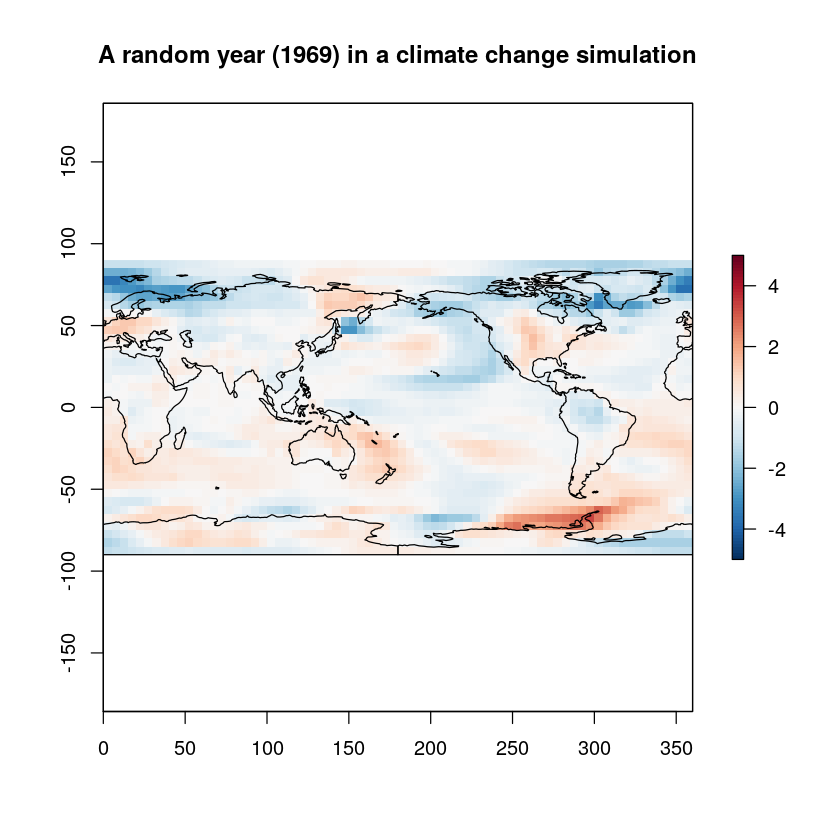

In [60]:
########################################################################
## 0.e. Visualize your dataset
########################################################################

# 1. plot random year's annual temperature anomalies (sample Nr. 2000):
par(mfrow=c(1,1))
plot.random.year <- raster.template 
values(plot.random.year) = c(matrix(LENS_tas_ann_train$X[2200,], 72, 36)[,36:1])
plot(plot.random.year, col = col.seq, zlim = c(-5,5), main = "A random year (1969) in a climate change simulation")
lines(land.polygon)

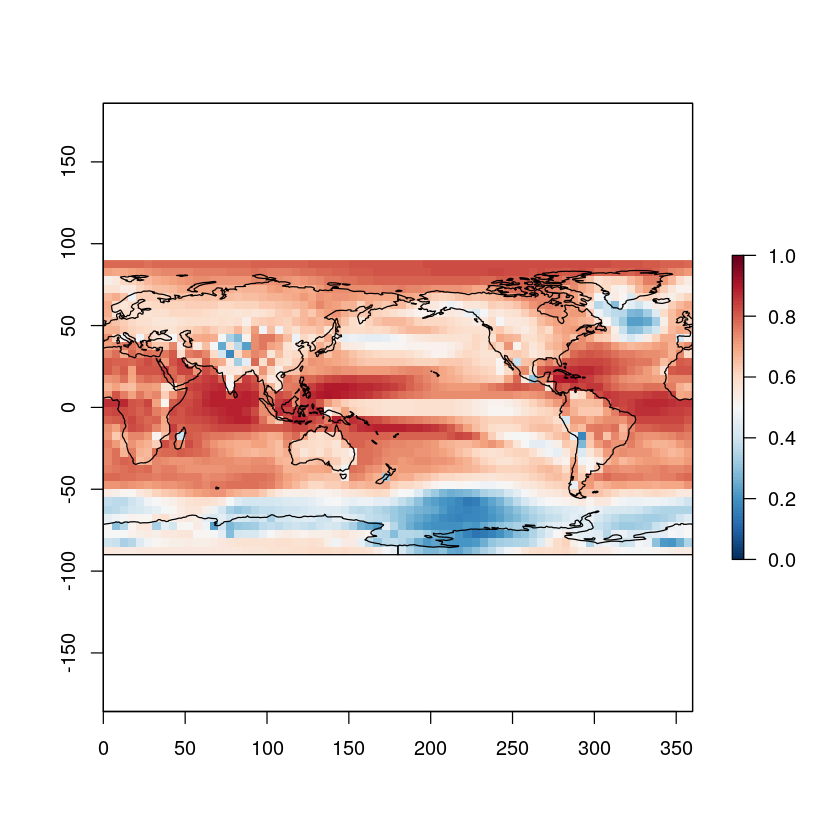

In [61]:
# 2. Correlations between each grid cell and the target "forced response"
mar.cor = apply(X = LENS_tas_ann_train$X, MARGIN=2, FUN=function(x) cor(x, LENS_tas_ann_train$Y$fraw))

plot.mar.cor <- raster.template 
values(plot.mar.cor) = c(matrix(mar.cor, 72, 36)[,36:1])
plot(plot.mar.cor, col = col.seq, zlim = c(0,1))
lines(land.polygon)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6


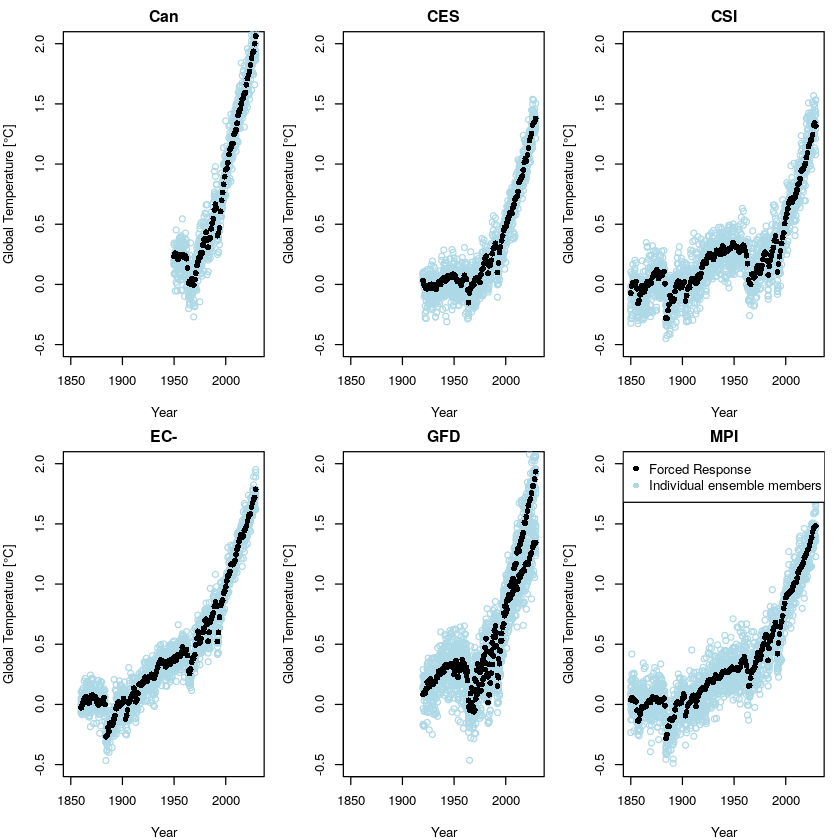

In [62]:
# 3. forced response and year for each ensemble member:
par(mfrow=c(2,3), mar=c(4,4,2,1))

for (i in 1:length(unique(LENS_tas_ann_train$M$modcl))) {
  print(i)
  ix=which(LENS_tas_ann_train$M$modcl == unique(LENS_tas_ann_train$M$modcl)[i])
  
  plot(c(1,1), xlim = c(1850, 2030), ylim = c(-0.5, 2), xlab = "Year", ylab = "Global Temperature [°C]", main = unique(LENS_tas_ann_train$M$modcl)[i])
  points(x = LENS_tas_ann_train$Y$year[ix], y = LENS_tas_ann_train$Y$AGMT[ix], col = "lightblue")
  points(x = LENS_tas_ann_train$Y$year[ix], y = LENS_tas_ann_train$Y$fraw[ix], pch = 16)
}
legend("topleft", c("Forced Response", "Individual ensemble members"), pch = 16, col = c("black", "lightblue"))

## Apply Model P2: Estimation of the state of forced climate change from annual temperature maps

Simple prediction workflow using multiple linear regression

In [63]:
########################################################################
########################################################################
## 1. Simple prediction workflow using multiple linear regression
########################################################################
########################################################################

########################################################################
## 1.a. Setup of training data & feature selection
########################################################################

# 1. Perform simple randomized feature selection:
set.seed(seed = 5)
grid.ix = sort(sample(x = 1:2592, size = 20, replace = F, prob = LENS_tas_ann_train$coord$areaw))

# 2. Generate data frames for OLS fit:
train.DF = data.frame(y=LENS_tas_ann_train$Y$fraw, X = LENS_tas_ann_train$X[,grid.ix])
train.DF2 = data.frame(y=LENS_tas_ann_train$Y$year, X = LENS_tas_ann_train$X[,grid.ix])

In [64]:
########################################################################
## 1.b. Fit OLS models for both target metrics
########################################################################

# 3 Fit OLS for both target metrics using all data
# (you may not want to use the same data for fitting and evaluation with statistical learning methods - split into train/test data or cross-vali):
my.OLS.mod = lm(y ~ ., data = train.DF)
my.OLS.pred = predict(object = my.OLS.mod, newdata = data.frame(X = LENS_tas_ann_train$X[,grid.ix]))
my.OLS.MSE = MSE(obs = LENS_tas_ann_train$Y$fraw, sim = my.OLS.pred)
my.OLS.R2 = cor(LENS_tas_ann_train$Y$fraw, my.OLS.pred) ^ 2

my.OLS2.mod = lm(y ~ ., data = train.DF2)
my.OLS2.pred = predict(object = my.OLS2.mod, newdata = data.frame(X = LENS_tas_ann_train$X[,grid.ix]))
my.OLS2.MSE = MSE(obs = LENS_tas_ann_train$Y$year, sim = my.OLS2.pred)
my.OLS2.R2 = cor(LENS_tas_ann_train$Y$year, my.OLS2.pred) ^ 2

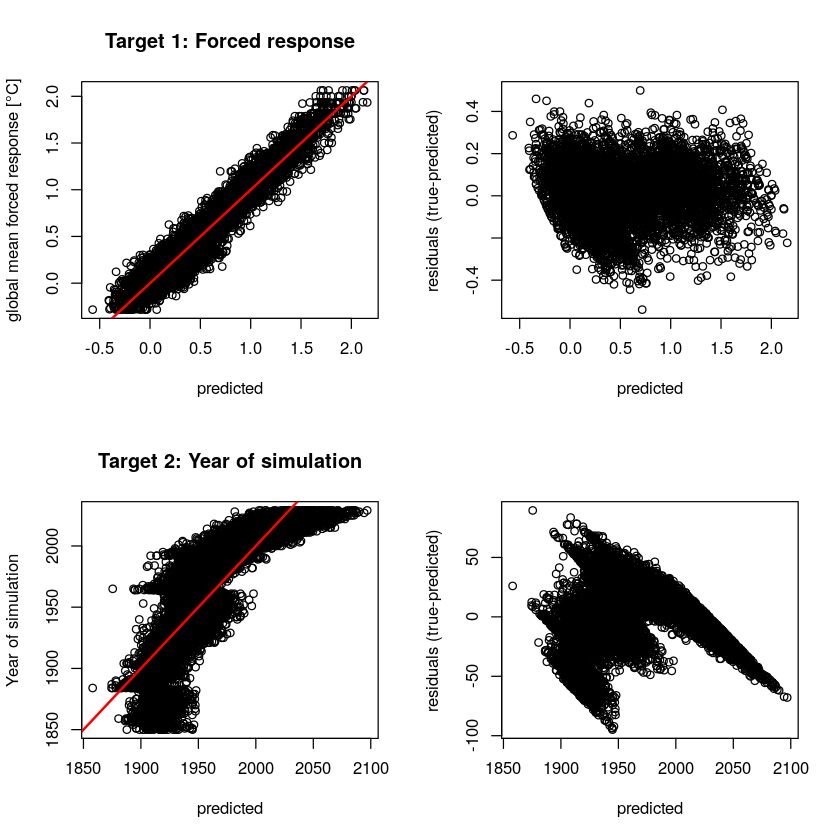

In [65]:
########################################################################
## 1.c. Visualize my predictions:
########################################################################

# upper row: predictions of global mean temperature forced response
# lower row: predictions of the year from which simulations comes
par(mfrow=c(2,2))
plot(my.OLS.pred, LENS_tas_ann_train$Y$fraw, xlab = "predicted", ylab = "global mean forced response [°C]", main = "Target 1: Forced response")
abline(0, 1, col = "red", lwd = 2)
plot(my.OLS.pred, LENS_tas_ann_train$Y$fraw - my.OLS.pred, xlab = "predicted", ylab = "residuals (true-predicted)")

plot(my.OLS2.pred, LENS_tas_ann_train$Y$year, xlab = "predicted", ylab = "Year of simulation", main = "Target 2: Year of simulation")
abline(0, 1, col = "red", lwd = 2)
plot(my.OLS2.pred, LENS_tas_ann_train$Y$year - my.OLS2.pred, xlab = "predicted", ylab = "residuals (true-predicted)")

In [66]:
########################################################################
## 1.d. Derive predictions for unssen test dataset.
########################################################################


my.OLS.fraw.pred = predict(object = my.OLS.mod, newdata = data.frame(X = LENS_tas_ann_test$X[,grid.ix]))
my.OLS.year.pred = predict(object = my.OLS2.mod, newdata = data.frame(X = LENS_tas_ann_test$X[,grid.ix]))

# save my predictions:
# save(c("my.OLS.fraw.pred", "my.OLS.year.pred"), file = "groupX.prediction.RData")

## Now it's your turn!

# Libraries and Data

In [67]:
# Load all Libraries
library(raster)
library(RColorBrewer)
library(rworldmap)
library(ncdf4)
library(tidyverse)
library(glmnet)
library(gbm)

# Load functions
MSE <- function(obs, sim) { mean( ( obs - sim ) ^ 2 ) }

# Load data
load("data_Project2/Project2_data.Rdata")

# Approach 1 - Random Split

## Data Splitting

In [68]:
# get X, Y1, Y2
X = as.matrix(LENS_tas_ann_train$X) 
Y.fraw = as.matrix(LENS_tas_ann_train$Y$fraw)
Y.year = as.matrix(LENS_tas_ann_train$Y$year)

# Separate to train and test datasets
set.seed(8)
split = 0.75
train_ind <- sample(seq_len(nrow(X)), size = floor(split * nrow(X)))

X_train <- X[train_ind,]
Y1_train <- Y.fraw[train_ind,]
Y2_train <- Y.year[train_ind,]

X_test <- X[-train_ind,]
Y1_test <- Y.fraw[-train_ind,]
Y2_test <- Y.year[-train_ind,]

## Linear Model - Training

In [69]:
# CV Setup
lambda_seq <- 10^seq(-6, 2, length.out = 50)     

In [70]:
## >> SKIP TO NEXT CELL TO SAVE TIME AND NOT RUN THESE MODELS AGAIN
# Cross-validation
# lasso.cv.fraw <- cv.glmnet(X_train,
#                            Y1_train,
#                            alpha = 1,
#                            lambda = lambda_seq, 
#                            nfolds = 10) # foldid = df_train$modcl TODO: Could be used to have model training per climate model
# 
# 
# lasso.cv.year <- cv.glmnet(X_train,
#                            Y2_train,
#                            alpha = 1, 
#                            lambda = lambda_seq, 
#                            nfolds = 10) # foldid = df_train$modcl
# 
# saveRDS(lasso.cv.fraw, "./output/lasso.cv.fraw_randomsplit_10CV_50lambda.rds")
# saveRDS(lasso.cv.year, "./output/lasso.cv.year_randomsplit_10CV_50lambda.rds")

In [71]:
## > RUN THIS CELL TO LOAD MODELS
lasso.cv.fraw <- readRDS("./output/lasso.cv.fraw_randomsplit_10CV_50lambda.rds")
lasso.cv.year <- readRDS("./output/lasso.cv.year_randomsplit_10CV_50lambda.rds")

[1] "Best lambda for target fraw: 4.29193426012878e-05"

[1] "Best lambda for target year: 0.0175751062485479"

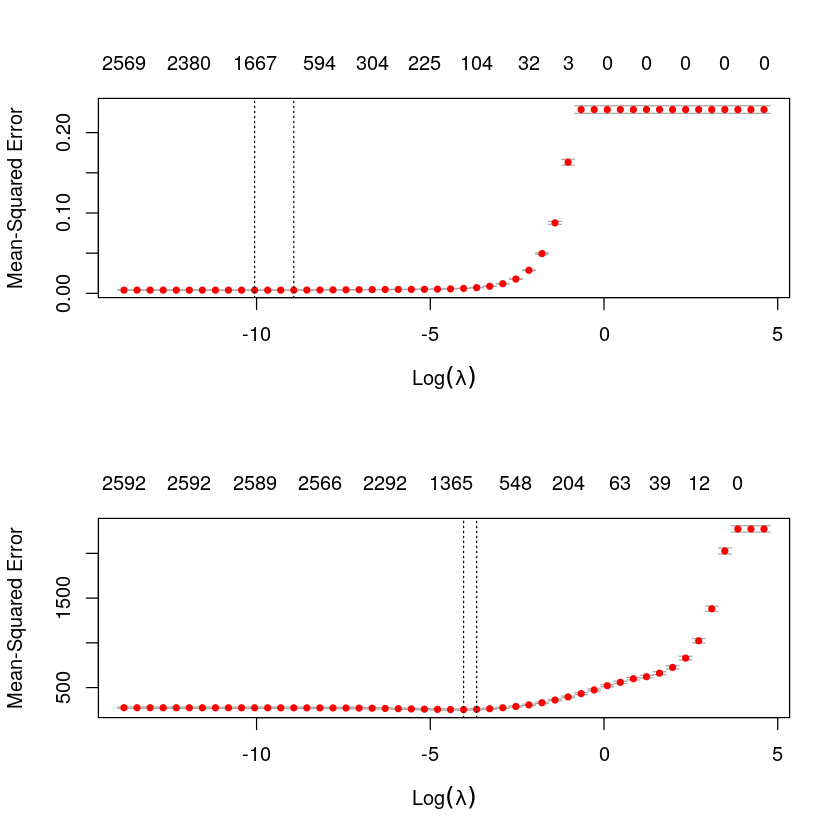

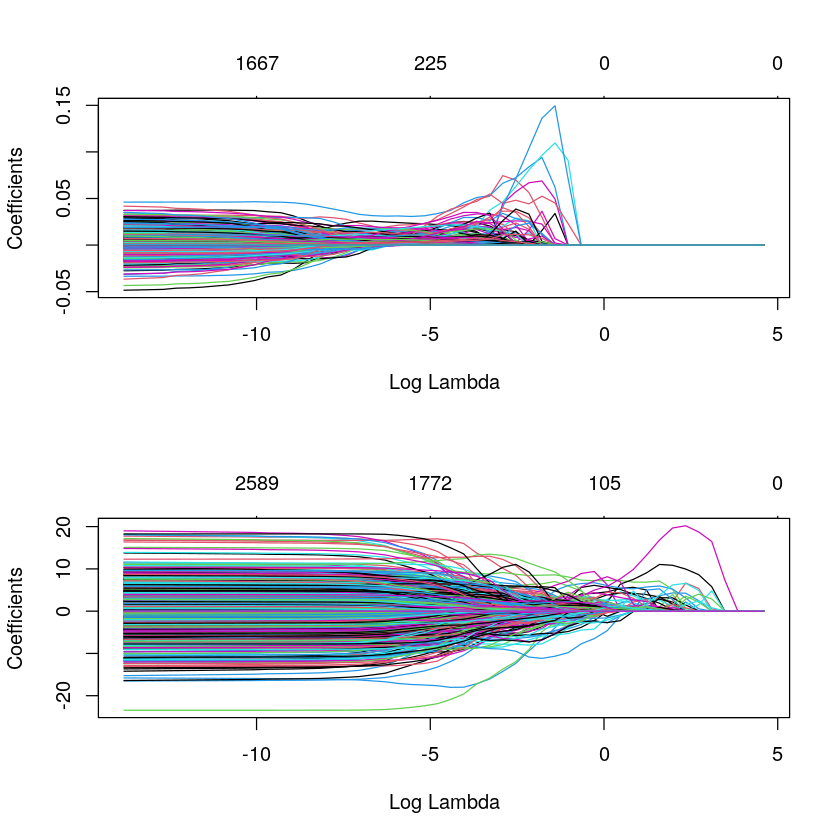

In [72]:
## > This cell takes some time to fit and plot the model with the best lambda...
# Identifying best lambda
lambda.fraw <- lasso.cv.fraw$lambda.min
lambda.year <- lasso.cv.year$lambda.min

sprintf("Best lambda for target fraw: %s", lambda.fraw)
sprintf("Best lambda for target year: %s", lambda.year)

# Plot CV-MSE for lambda
par(mfrow=c(2,1))
plot(lasso.cv.fraw)
plot(lasso.cv.year)

# Fit best model with best lambda from CV
lasso.fraw = glmnet(x = X_train,
                    y = Y1_train,
                    family = "gaussian", 
                    alpha = 1, 
                    standardize = T, 
                    lambda = lambda_seq)

lasso.year = glmnet(x = X_train,
                    y = Y2_train,
                    family = "gaussian", 
                    alpha = 1, 
                    standardize = T, 
                    lambda = lambda_seq)

# Plot shrinkage of coefficients
par(mfrow = c(2,1))
plot(lasso.fraw, xvar = 'lambda')
plot(lasso.year, xvar = 'lambda')

## Linear Model - Evaluation

In [73]:
# Prediction
fraw_pred = predict(lasso.fraw, s = lambda.fraw, X_test)
fraw_MSE = MSE(obs = Y1_test, sim = fraw_pred)
fraw_R2 = cor(Y1_test, fraw_pred) ^ 2

year_pred = predict(lasso.year, s = lambda.year, X_test)
year_MSE = MSE(obs = Y2_test, sim = year_pred)
year_R2 = cor(Y2_test, year_pred) ^ 2

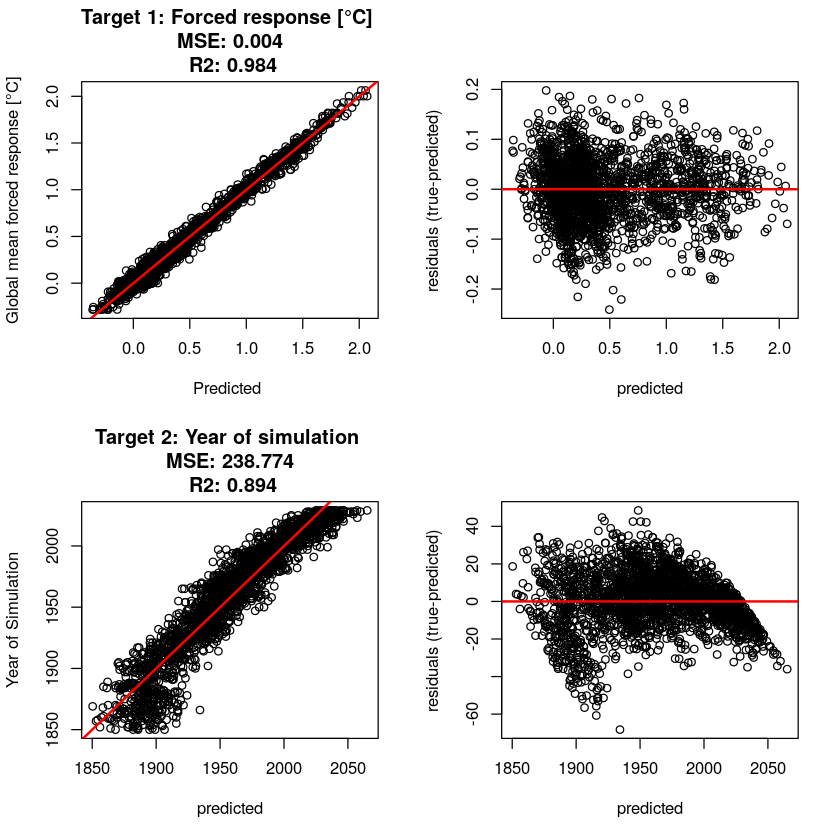

In [74]:
# Visualize the prediction
par(mfrow=c(2,2))
plot(fraw_pred, Y1_test, xlab = "Predicted ", ylab = "Global mean forced response [°C]", main = paste("Target 1: Forced response [°C]", sprintf("\n MSE: %.3f", fraw_MSE), sprintf("\n R2: %.3f", fraw_R2)))
abline(0, 1, col = "red", lwd = 2)
plot(fraw_pred, Y1_test - fraw_pred, xlab = "predicted", ylab = "residuals (true-predicted)")
abline(0, 0, col = "red", lwd = 2)

plot(year_pred, Y2_test , xlab = "predicted", ylab = "Year of Simulation", main = paste( "Target 2: Year of simulation", sprintf("\n MSE: %.3f", year_MSE), sprintf("\n R2: %.3f", year_R2)))
abline(0, 1, col = "red", lwd = 2)
plot(year_pred, Y2_test - year_pred, xlab = "predicted", ylab = "residuals (true-predicted)")
abline(0, 0, col = "red", lwd = 2)


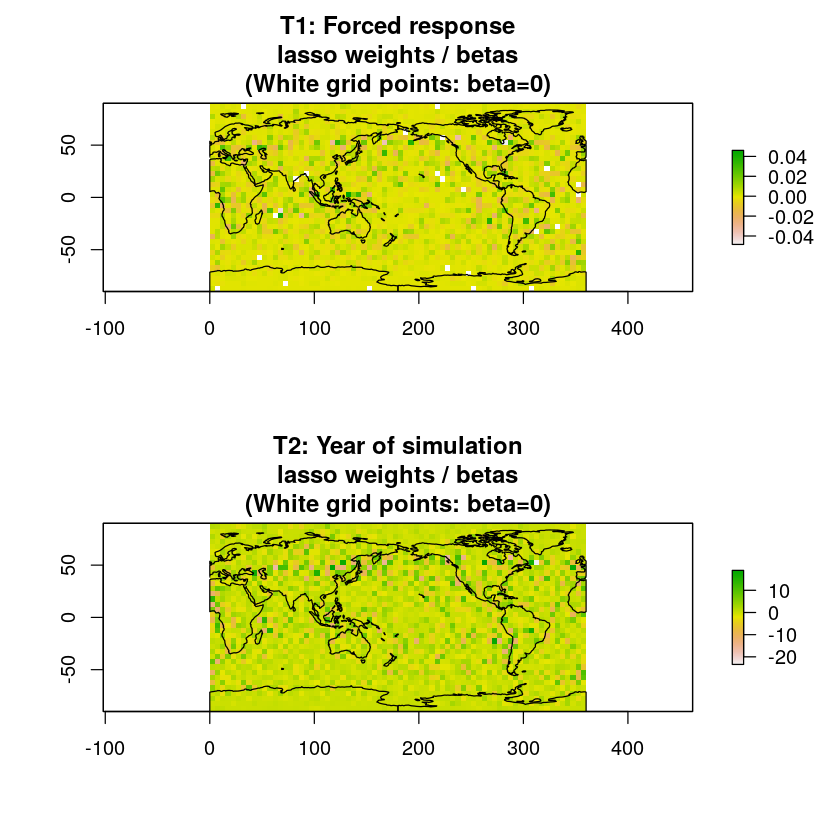

In [75]:
# Visualize the features maps
par(mfrow=c(2,1))

plot.lasso.fraw.coef <- raster.template
values(plot.lasso.fraw.coef) = as.matrix(coef(lasso.fraw, lasso.fraw$lasso.min)[2:2593,length(lambda_seq)])
values(plot.lasso.fraw.coef)[values(plot.lasso.fraw.coef)==0] <- NA

plot(plot.lasso.fraw.coef, main="T1: Forced response\nlasso weights / betas\n(White grid points: beta=0)")
lines(land.polygon)

plot.lasso.year.coef <- raster.template
values(plot.lasso.year.coef) = as.matrix(coef(lasso.year, lasso.year$lasso.min)[2:2593,length(lambda_seq)])
values(plot.lasso.year.coef)[values(plot.lasso.year.coef)==0] <- NA

plot(plot.lasso.year.coef, main="T2: Year of simulation\nlasso weights / betas\n(White grid points: beta=0)")
lines(land.polygon)


## Non-linear Model - Training

In [76]:
## For quick start without previous model training:
## - Load correct data split
## - Load length of lambda_sequence
## - Load lasso models

## Feature selection
cut_fraw <- 0.0017 # threshold to drop predictors / grid cells for target fraw
cut_year <- 0.99     # threshold to drop predictors / grid cells for target year

fraw.ind <- which(abs(as.matrix(coef(lasso.fraw, lasso.fraw$lasso.min)[2:2593,length(lambda_seq)]))>cut_fraw) 
year.ind <- which(abs(as.matrix(coef(lasso.year, lasso.year$lasso.min)[2:2593,length(lambda_seq)]))>cut_year)     

## Check percentage of predictor subsets
perc_fraw <- (round(length(fraw.ind) / ncol(X_train) * 100, 1))
perc_year <- (round(length(year.ind) / ncol(X_train) * 100, 1))

cat("Feature selection for fraw as percentage of all features:", perc_fraw, "% \n ")
cat("Feature selection for year as percentage of all features:", perc_year, "% \n")

Feature selection for fraw as percentage of all features: 50.4 % 
 Feature selection for year as percentage of all features: 54.7 % 


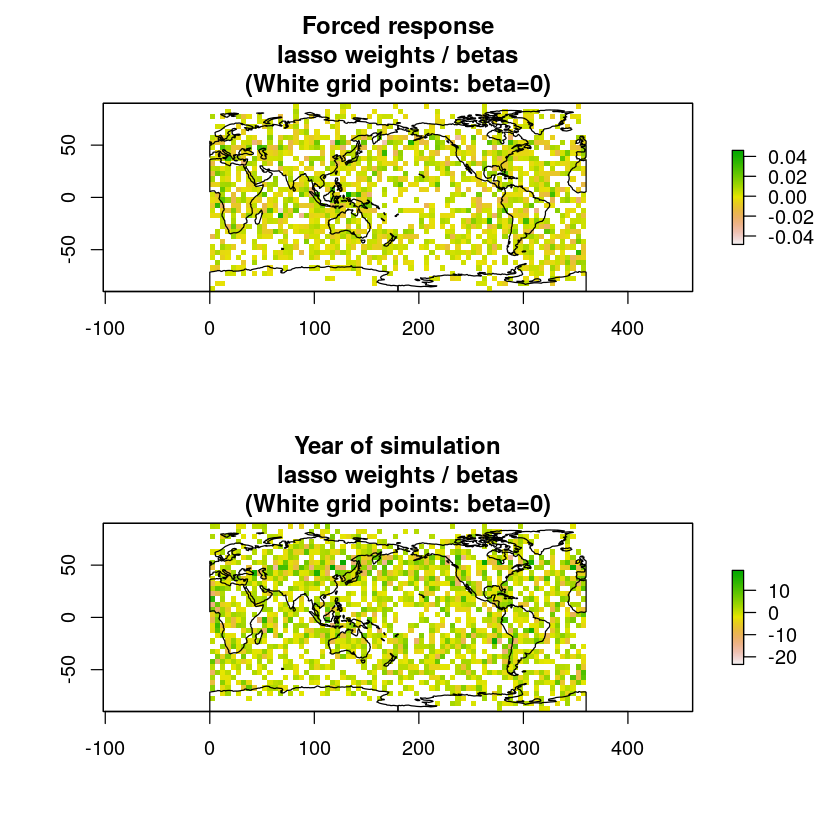

In [77]:
## Visualize predictor subsets
par(mfrow=c(2,1))

plot.lasso.fraw.coef <- raster.template
values(plot.lasso.fraw.coef) = as.matrix(coef(lasso.fraw, lasso.fraw$lasso.min)[2:2593,length(lambda_seq)])
values(plot.lasso.fraw.coef)[abs(values(plot.lasso.fraw.coef))<cut_fraw] <- NA

plot(plot.lasso.fraw.coef, main="Forced response\nlasso weights / betas\n(White grid points: beta=0)")
lines(land.polygon)

plot.lasso.year.coef <- raster.template
values(plot.lasso.year.coef) = as.matrix(coef(lasso.year, lasso.year$lasso.min)[2:2593,length(lambda_seq)])
values(plot.lasso.year.coef)[abs(values(plot.lasso.year.coef))<cut_year] <- NA

plot(plot.lasso.year.coef, main="Year of simulation\nlasso weights / betas\n(White grid points: beta=0)")
lines(land.polygon)


In [78]:
# Training setup 
B   <- 2500
d   <- 4
lmd <- 0.01
cvf <- 5

In [79]:
## Model training and saving
# Forced response
# fit.fraw <- gbm(y ~ .,
#                 data = data.frame(y = Y1_train, X = X_train[,fraw.ind]),
#                 distribution = 'gaussian',
#                 n.tree=B,
#                 interaction.depth=d,
#                 shrinkage=lmd,
#                 bag.fraction=1,
#                 cv=cvf)
# 
# saveRDS(fit.fraw, paste0("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/bt.cv.fraw_randomsplit", "_subset_cut", cut_fraw, "_B", B, "_d", d, "_lmd", lmd, "_cv", cvf, ".rds"))

In [80]:
# # Year of simulation
# fit.year <- gbm(y ~ .,
#                 data = data.frame(y = Y2_train, X = X_train[,year.ind]),
#                 distribution = 'gaussian',
#                 n.tree=B,
#                 interaction.depth=d,
#                 shrinkage=lmd,
#                 bag.fraction=1,
#                 cv=cvf)
# 
# saveRDS(fit.year, paste0("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/bt.cv.year_randomsplit", "_subset_cut", cut_year, "_B", B, "_d", d, "_lmd", lmd, "_cv", cvf, ".rds"))

## Non-linear Model - Evaluation

### Find best model 

In [81]:
## Print all created models
all_mods <- list.files("./output/", pattern = "random")
all_mods <- all_mods[grep(pattern = "bt", all_mods)]
all_year <- all_mods[grep(pattern = "year", all_mods)]
all_fraw <- all_mods[grep(pattern = "fraw", all_mods)]

#print("Year Models")
#print(all_year)
#print("Fraw Models")
#print(all_fraw)
#print("************************************************")

l <- max(length(all_year), length(all_fraw))

## Loop over all models
df_fraw <- tibble(file = rep(NA, l))
df_year <- tibble(file = rep(NA, l))

for (i in 1:length(all_fraw)){
    
    if (file.exists(paste0("./output/", all_fraw[i]))){
        ## Load Models
        fit.fraw <- readRDS(paste0("./output/", all_fraw[i]))

        ## Get best n.tree
        best.n.tree.fraw <- gbm.perf(fit.fraw, method="cv", plot.it=F)

        ## Make predictions and get metrics:
        fraw_bt_pred <- predict(fit.fraw, data.frame(y=Y1_test, X=X_test), n.tree=best.n.tree.fraw)
        fraw_bt_MSE = MSE(obs = Y1_test, sim = fraw_bt_pred)
        fraw_bt_R2 = cor(Y1_test, fraw_bt_pred) ^ 2

        df_fraw$file[i]   <- paste0(all_fraw[i])
        df_fraw$best_b[i] <- best.n.tree.fraw
        df_fraw$r2[i]     <- fraw_bt_R2
        df_fraw$mse[i]    <- fraw_bt_MSE
    } else {
        df_fraw$file[i]   <- NA
        df_fraw$best_b[i] <- NA
        df_fraw$r2[i]     <- NA
        df_fraw$mse[i]    <- NA
    }
    
    if (file.exists(paste0("./output/", all_year[i]))){
        fit.year <- readRDS(paste0("./output/", all_year[i]))
        best.n.tree.year <- gbm.perf(fit.year, method="cv", plot.it=F)
        year_bt_pred = predict(fit.year, data.frame(y=Y2_test, X=X_test), n.tree=best.n.tree.year)
        year_bt_MSE = MSE(obs = Y2_test, sim = year_bt_pred)
        year_bt_R2 = cor(Y2_test, year_bt_pred) ^ 2

        df_year$file[i]   <- paste0(all_year[i])
        df_year$best_b[i] <- best.n.tree.year
        df_year$r2[i]     <- year_bt_R2
        df_year$mse[i]    <- year_bt_MSE
    } else {
        df_year$file[i]   <- NA
        df_year$best_b[i] <- NA
        df_year$r2[i]     <- NA
        df_year$mse[i]    <- NA
    }
}

## Print it

df_fraw %>% arrange(r2)
df_year %>% arrange(r2)

Warning message:
“Unknown or uninitialised column: `best_b`.”
Warning message:
“Unknown or uninitialised column: `r2`.”
Warning message:
“Unknown or uninitialised column: `mse`.”
Warning message:
“Unknown or uninitialised column: `best_b`.”
Warning message:
“Unknown or uninitialised column: `r2`.”
Warning message:
“Unknown or uninitialised column: `mse`.”


file,best_b,r2,mse
<chr>,<int>,<dbl>,<dbl>
bt.cv.fraw_randomsplit_subset_cut0.005_B10000_d5_lmd0.01_cv5.rds,9999,0.5270730,0.11369069
bt.cv.fraw_randomsplit_subset_perc13.8_B5000_d4_lmd0.001_cv5.rds,5000,0.6465268,0.09137608
bt.cv.fraw_randomsplit_subset_cut0.003_B5000_d4_lmd0.1_cv5.rds,4867,0.7160959,0.06768842
bt.cv.fraw_randomsplit_subset_cut0.0025_B10000_d4_lmd0.01_cv10.rds,9999,0.7743755,0.05568333
bt.cv.fraw_randomsplit_subset_cut0.0025_B10000_d4_lmd0.01_cv5.rds,10000,0.7743762,0.05568311
bt.cv.fraw_randomsplit_10CV_B5000_d4_lmd0.01.rds,5000,0.8105407,0.05060560
bt.cv.fraw_randomsplit_subset_cut0.00075_B5000_d5_lmd0.01_cv10.rds,5000,0.8736894,0.03427383
bt.cv.fraw_randomsplit_subset_cut0.00075_B5000_d4_lmd0.01_cv10.rds,4999,0.8768052,0.03303076
bt.cv.fraw_randomsplit_subset_cut0_B2500_d4_lmd0.01_cv5.rds,2500,0.9206996,0.01928365


file,best_b,r2,mse
<chr>,<int>,<dbl>,<dbl>
bt.cv.year_randomsplit_subset_cut1.8_B5000_d4_lmd0.01_cv5.rds,4998,0.4801688,1380.0848
bt.cv.year_randomsplit_subset_cut1.8_B5000_d4_lmd0.01_cv10.rds,4997,0.4802046,1379.8214
bt.cv.year_randomsplit_subset_cut0.575_B5000_d4_lmd0.01_cv10.rds,5000,0.6075972,1062.9895
bt.cv.year_randomsplit_subset_cut0.575_B5000_d5_lmd0.01_cv10.rds,5000,0.6120993,1065.1514
bt.cv.year_randomsplit_subset_cut0.575_B5000_d4_lmd0.001_cv10.rds,5000,0.6139229,986.6818
bt.cv.year_randomsplit_subset_cut0_B2500_d4_lmd0.01_cv5.rds,2500,0.8777111,274.3714
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA



 TARGET FRAW -------------------- 
Best model file:  bt.cv.fraw_randomsplit_subset_cut0_B2500_d4_lmd0.01_cv5.rds 
Highest R2 = Lowest MSE?:  TRUE 
Optimal number of trees:  2500 

 TARGET YEAR -------------------- 
Best model file:  bt.cv.year_randomsplit_subset_cut0_B2500_d4_lmd0.01_cv5.rds 
Highest R2 = Lowest MSE?:  TRUE 
Optimal number of trees:  2500 


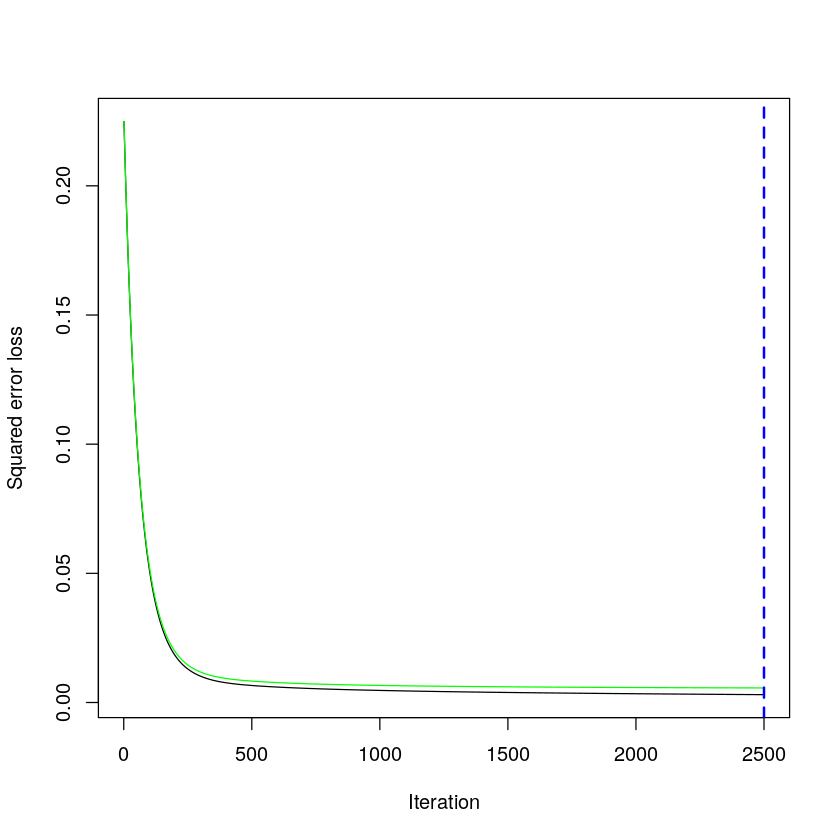


 PREDICTIONS -------------------- 


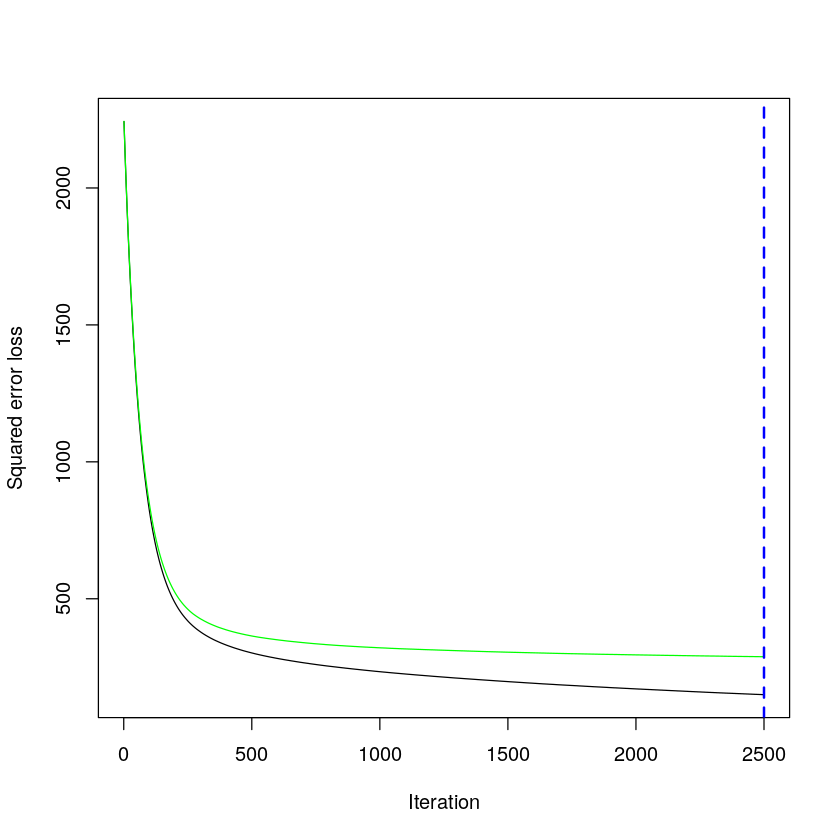

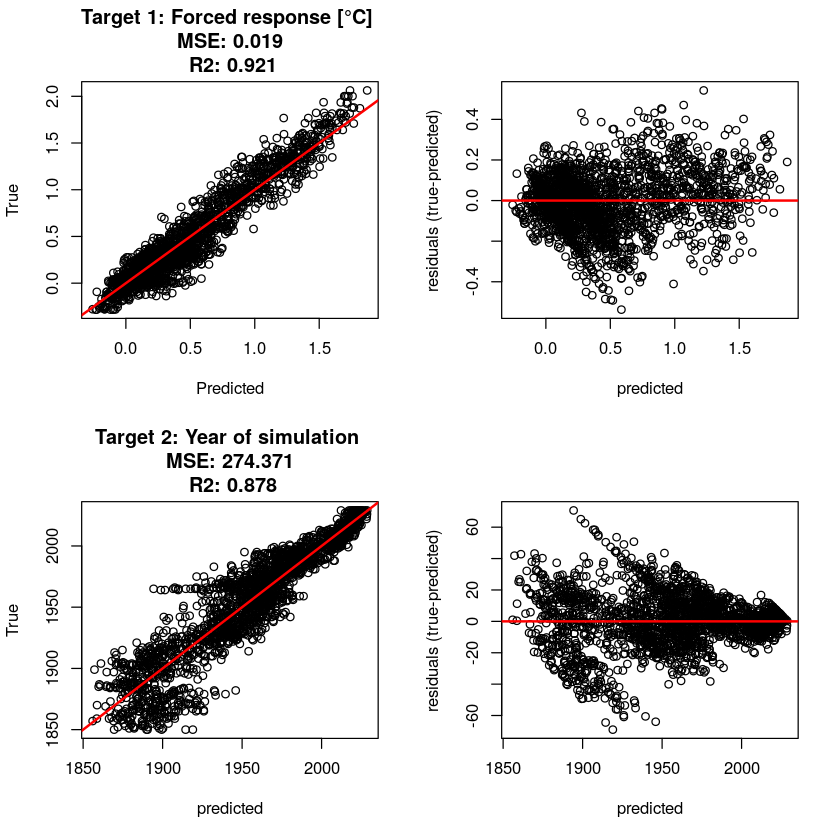

In [82]:
## Load best models
file_best_fraw <- df_fraw %>% top_n(1, r2) %>% pull(file)
fit.fraw <- readRDS(paste0("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/", file_best_fraw))

file_best_year <- df_year %>% top_n(1, r2) %>% pull(file)
fit.year <- readRDS(paste0("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/", file_best_year))

# Find optimal number of trees
best.n.tree.fraw <- gbm.perf(fit.fraw, method="cv", plot.it = F)
best.n.tree.year <- gbm.perf(fit.year, method="cv", plot.it = F)

# Predictions
fraw_pred <- predict(fit.fraw, data.frame(y=Y1_test, X=X_test), n.tree=best.n.tree.fraw)
fraw_MSE = MSE(obs = Y1_test, sim = fraw_pred)
fraw_R2 = cor(Y1_test, fraw_pred) ^ 2

year_pred = predict(fit.year, data.frame(y=Y2_test, X=X_test), n.tree=best.n.tree.year)
year_MSE = MSE(obs = Y2_test, sim = year_pred)
year_R2 = cor(Y2_test, year_pred) ^ 2

## Show Outputs -> CV Plots are messy, they do not appear in order they are called. First one is for FRAW and second for YEAR
## Check if highest r2 is lowest mse
cat("\n TARGET FRAW -------------------- \n")
cat("Best model file: ", file_best_fraw, "\n")
cat("Highest R2 = Lowest MSE?: ", df_fraw %>% top_n(1, r2) %>% pull(file) == df_fraw %>% top_n(-1, mse) %>% pull(file), "\n")
cat("Optimal number of trees: ", best.n.tree.fraw, "\n")
best.n.tree.fraw <- gbm.perf(fit.fraw, method="cv", plot.it = T)


cat("\n TARGET YEAR -------------------- \n")
cat("Best model file: ", file_best_year, "\n")
cat("Highest R2 = Lowest MSE?: ", df_fraw %>% top_n(1, r2) %>% pull(file) == df_fraw %>% top_n(-1, mse) %>% pull(file), "\n")
cat("Optimal number of trees: ", best.n.tree.year, "\n")
best.n.tree.year <- gbm.perf(fit.year, method="cv", plot.it = T)

# Visualize the prediction
cat("\n PREDICTIONS -------------------- \n")
par(mfrow=c(2,2))
plot(fraw_pred, Y1_test, xlab = "Predicted", ylab = "True", main = paste("Target 1: Forced response [°C]", sprintf("\n MSE: %.3f", fraw_MSE), sprintf("\n R2: %.3f", fraw_R2)))
abline(0, 1, col = "red", lwd = 2)
plot(fraw_pred, Y1_test - fraw_pred, xlab = "predicted", ylab = "residuals (true-predicted)")
abline(0, 0, col = "red", lwd = 2)

plot(year_pred, Y2_test , xlab = "predicted", ylab = "True", main = paste( "Target 2: Year of simulation", sprintf("\n MSE: %.3f", year_MSE), sprintf("\n R2: %.3f", year_R2)))
abline(0, 1, col = "red", lwd = 2)
plot(year_pred, Y2_test - year_pred, xlab = "predicted", ylab = "residuals (true-predicted)")
abline(0, 0, col = "red", lwd = 2)

# Approach 2 - Leave one model out

## Data Splitting

In [83]:
## Getting all information into one dataframe to make selection and filtering easier
names_x  <- names(LENS_tas_ann_train$X %>% as_tibble())         # Get names of tibble variables for selection below
df_tmp   <- bind_cols(tibble(fraw = LENS_tas_ann_train$Y$fraw,  # Get vector for fraw
                             year = LENS_tas_ann_train$Y$year), # Get vector for year
                      LENS_tas_ann_train$X %>% as_tibble(),     # Get raster data
                      LENS_tas_ann_train$M %>% as_tibble() %>% dplyr::select(-year)) # Get meta data (drop year because confusion with target metric "year")

## Select data from all models but "CSI" to use for training and to test on "CSI" data
df_train <- df_tmp %>% dplyr::filter(modcl != "CSI")
df_test  <- df_tmp %>% dplyr::filter(modcl == "CSI")

## Create X matrices for training and testing
X_train  <- df_train %>% dplyr::select(all_of(names_x)) %>% as.matrix()
X_test   <- df_test  %>% dplyr::select(all_of(names_x)) %>% as.matrix()

## Create Y matrices for training and testing
## For fraw metric
Y1_train <- df_train %>% dplyr::filter(modcl != "CSI") %>% dplyr::select(fraw) %>% rename(y = fraw) %>% as.matrix()
Y1_test  <- df_test  %>% dplyr::filter(modcl == "CSI") %>% dplyr::select(fraw) %>% rename(y = fraw) %>% as.matrix()

## For year metric
Y2_train <- df_train %>% dplyr::filter(modcl != "CSI") %>% dplyr::select(year) %>% rename(y = year) %>% as.matrix()
Y2_test  <- df_test  %>% dplyr::filter(modcl == "CSI") %>% dplyr::select(year) %>% rename(y = year) %>% as.matrix()

## Holding out "CSI" for testing leads to a data split of ca. 75/25 for train/test routines
cat("\n Fraction Train Data:", nrow(Y2_train)/nrow(df_tmp))
cat("\n Fraction Test Data:",  nrow(Y2_test)/nrow(df_tmp))


 Fraction Train Data: 0.8021978
 Fraction Test Data: 0.1978022

## Linear Model - Training

In [84]:
# CV Setup
lambda_seq <- 10^seq(-6, 2, length.out = 50)     

In [85]:
## >> SKIP TO NEXT CELL TO SAVE TIME AND NOT RUN THESE MODELS AGAIN
# Cross-validation
# lasso.cv.fraw <- cv.glmnet(X_train,
#                            Y1_train,
#                            alpha = 1,
#                            lambda = lambda_seq, 
#                            nfolds = 10) # foldid = df_train$modcl TODO: Could be used to have model training per climate model
# 
# 
# lasso.cv.year <- cv.glmnet(X_train,
#                            Y2_train,
#                            alpha = 1, 
#                            lambda = lambda_seq, 
#                            nfolds = 10) # foldid = df_train$modcl
# 
# # Save models for later use
# saveRDS(lasso.cv.fraw, "~/IAC_lectures//2021_HS/SLAC//GroupProject/output/lasso.cv.fraw_CSIsplit_10CV_50lambda.rds")
# saveRDS(lasso.cv.year, "~/IAC_lectures//2021_HS/SLAC//GroupProject/output/lasso.cv.year_CSIsplit_10CV_50lambda.rds")

In [86]:
## > LOAD MODELS TO SAVE TIME
lasso.cv.fraw <- readRDS("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/lasso.cv.fraw_CSIsplit_10CV_50lambda.rds")
lasso.cv.year <- readRDS("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/lasso.cv.year_CSIsplit_10CV_50lambda.rds")

[1] "lambda.fraw: 2.02358964772516e-05"

[1] "lambda.year: 0.00828642772854684"

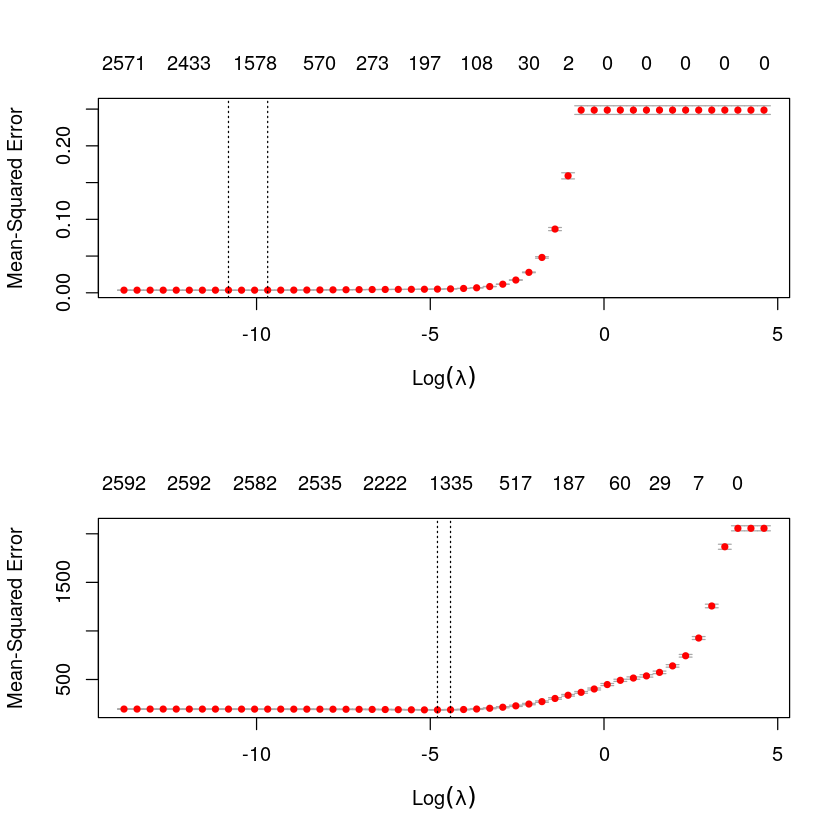

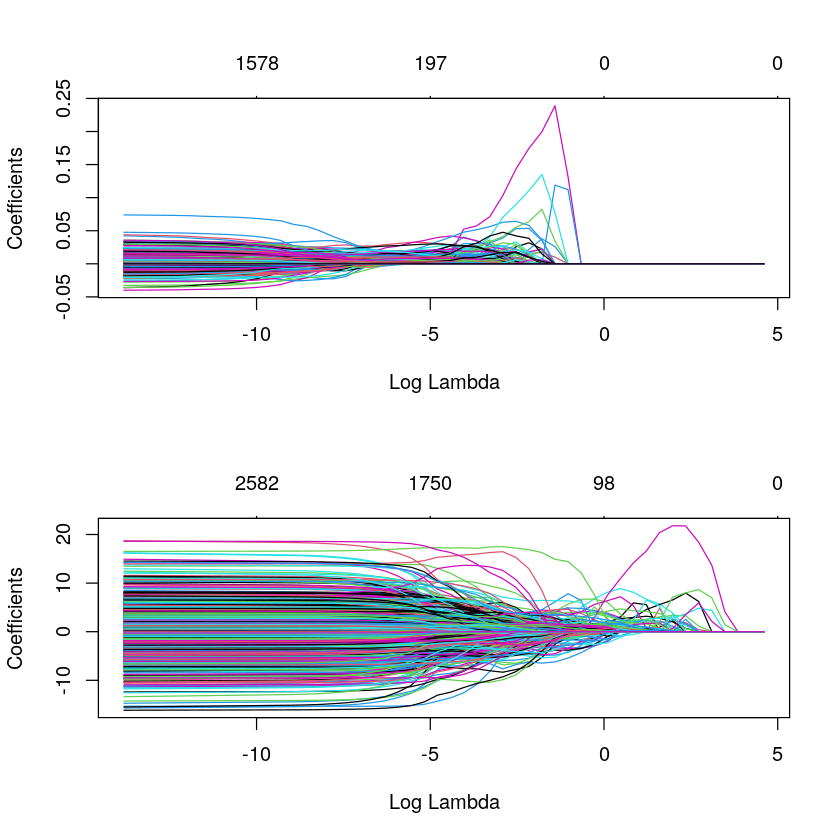

In [87]:
## > This cell takes some time to fit and plot the model with the best lambda...
# Identifying best lambda
lambda.fraw <- lasso.cv.fraw$lambda.min
lambda.year <- lasso.cv.year$lambda.min

sprintf("lambda.fraw: %s", lambda.fraw)
sprintf("lambda.year: %s", lambda.year)

# Plot CV-MSE for lambda
par(mfrow = c(2,1))
plot(lasso.cv.fraw)
plot(lasso.cv.year)

# Fit to LASSO
lasso.fraw = glmnet(x = X_train,
                    y = Y1_train,
                    family = "gaussian",
                    alpha = 1,
                    standardize = T,
                    lambda = lambda_seq)

lasso.year = glmnet(x = X_train,
                    y = Y2_train,
                    family = "gaussian",
                    alpha = 1,
                    standardize = T,
                    lambda = lambda_seq)

# Plot shrinkage of coefficients
par(mfrow = c(2,1))
plot(lasso.fraw, xvar = 'lambda')
plot(lasso.year, xvar = 'lambda')

## Linear Model - Evaluation

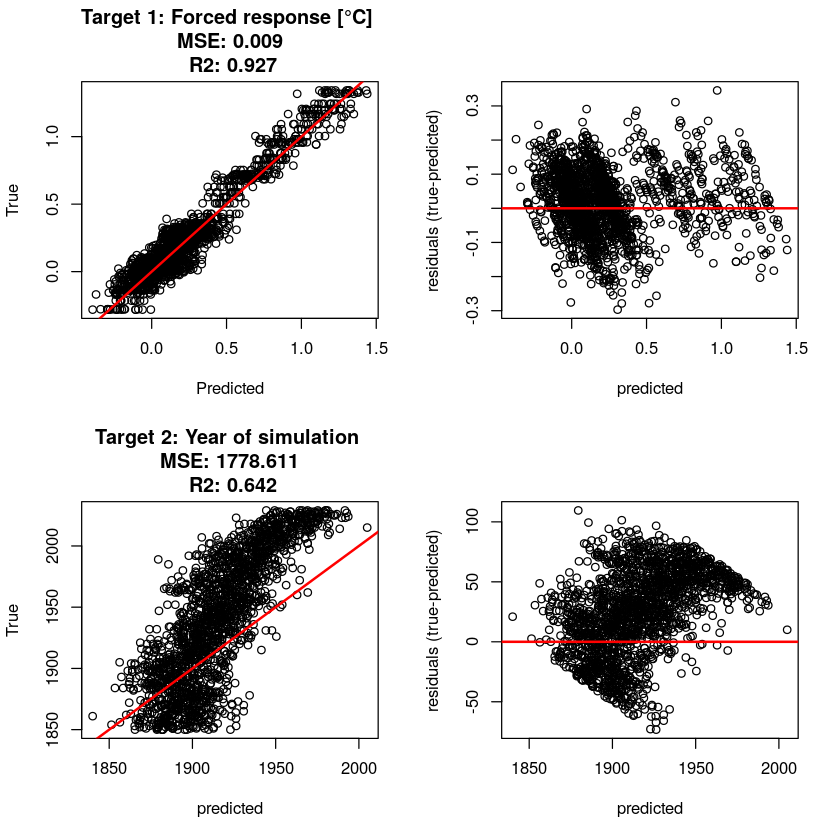

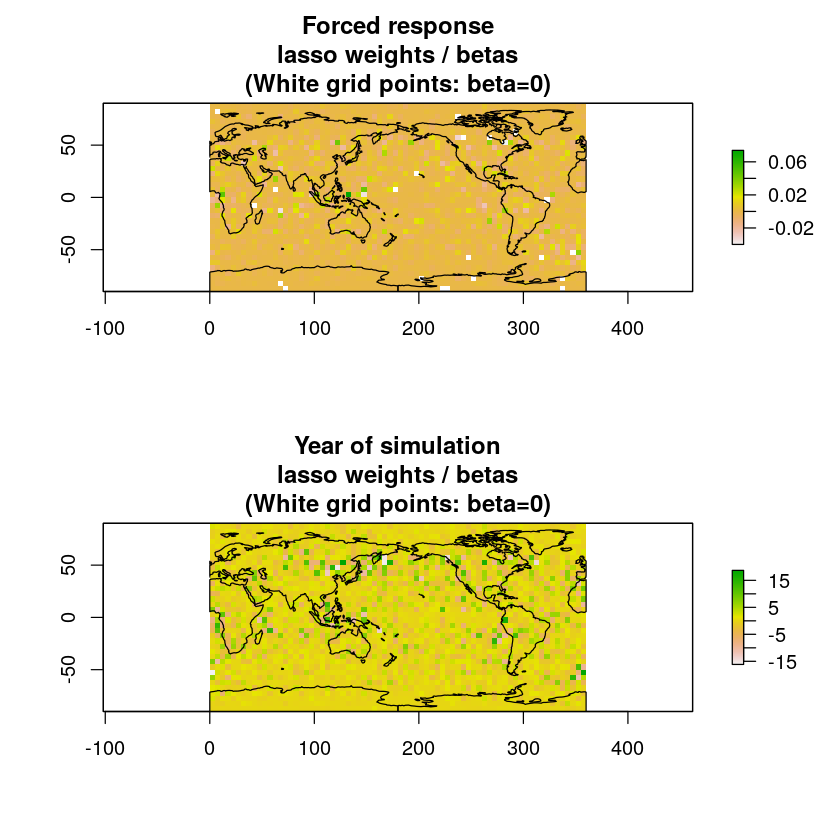

In [88]:
# Prediction
fraw_pred = predict(lasso.fraw, s = lambda.fraw, X_test)
fraw_MSE = MSE(obs = Y1_test, sim = fraw_pred)
fraw_R2 = cor(Y1_test, fraw_pred) ^ 2

year_pred = predict(lasso.year, s = lambda.year, X_test)
year_MSE = MSE(obs = Y2_test, sim = year_pred)
year_R2 = cor(Y2_test, year_pred) ^ 2

# Visualize the prediction
par(mfrow=c(2,2))
plot(fraw_pred, Y1_test, xlab = "Predicted", ylab = "True", main = paste("Target 1: Forced response [°C]", sprintf("\n MSE: %.3f", fraw_MSE), sprintf("\n R2: %.3f", fraw_R2)))
abline(0, 1, col = "red", lwd = 2)
plot(fraw_pred, Y1_test - fraw_pred, xlab = "predicted", ylab = "residuals (true-predicted)")
abline(0, 0, col = "red", lwd = 2)

plot(year_pred, Y2_test , xlab = "predicted", ylab = "True", main = paste( "Target 2: Year of simulation", sprintf("\n MSE: %.3f", year_MSE), sprintf("\n R2: %.3f", year_R2)))
abline(0, 1, col = "red", lwd = 2)
plot(year_pred, Y2_test - year_pred, xlab = "predicted", ylab = "residuals (true-predicted)")
abline(0, 0, col = "red", lwd = 2)

# Visualize the features maps
par(mfrow=c(2,1))

plot.lasso.fraw.coef <- raster.template
values(plot.lasso.fraw.coef) = as.matrix(coef(lasso.fraw, lasso.fraw$lasso.min)[2:2593,length(lambda_seq)])
values(plot.lasso.fraw.coef)[values(plot.lasso.fraw.coef)==0] <- NA

plot(plot.lasso.fraw.coef, main="Forced response\nlasso weights / betas\n(White grid points: beta=0)")
lines(land.polygon)

plot.lasso.year.coef <- raster.template
values(plot.lasso.year.coef) = as.matrix(coef(lasso.year, lasso.year$lasso.min)[2:2593,length(lambda_seq)])
values(plot.lasso.year.coef)[values(plot.lasso.year.coef)==0] <- NA

plot(plot.lasso.year.coef, main="Year of simulation\nlasso weights / betas\n(White grid points: beta=0)")
lines(land.polygon)


## Non-linear Model - Training

In [89]:
## For quick start without previous model training:
## - Load correct data split
## - Load length of lambda_sequence
## - Load lasso models

## Feature selection
cut_fraw <- 0.0016 # threshold to drop predictors / grid cells for target fraw
cut_year <- 1.05 # threshold to drop predictors / grid cells for target year

fraw.ind <- which(abs(as.matrix(coef(lasso.fraw, lasso.fraw$lasso.min)[2:2593,length(lambda_seq)]))>cut_fraw) 
year.ind <- which(abs(as.matrix(coef(lasso.year, lasso.year$lasso.min)[2:2593,length(lambda_seq)]))>cut_year)     

## Check percentage of predictor subsets
perc_fraw <- (round(length(fraw.ind) / ncol(X_train) * 100, 1))
perc_year <- (round(length(year.ind) / ncol(X_train) * 100, 1))

cat("Feature selection for fraw as percentage of all features:", perc_fraw, "% \n ")
cat("Feature selection for year as percentage of all features:", perc_year, "% \n")

Feature selection for fraw as percentage of all features: 50.1 % 
 Feature selection for year as percentage of all features: 50 % 


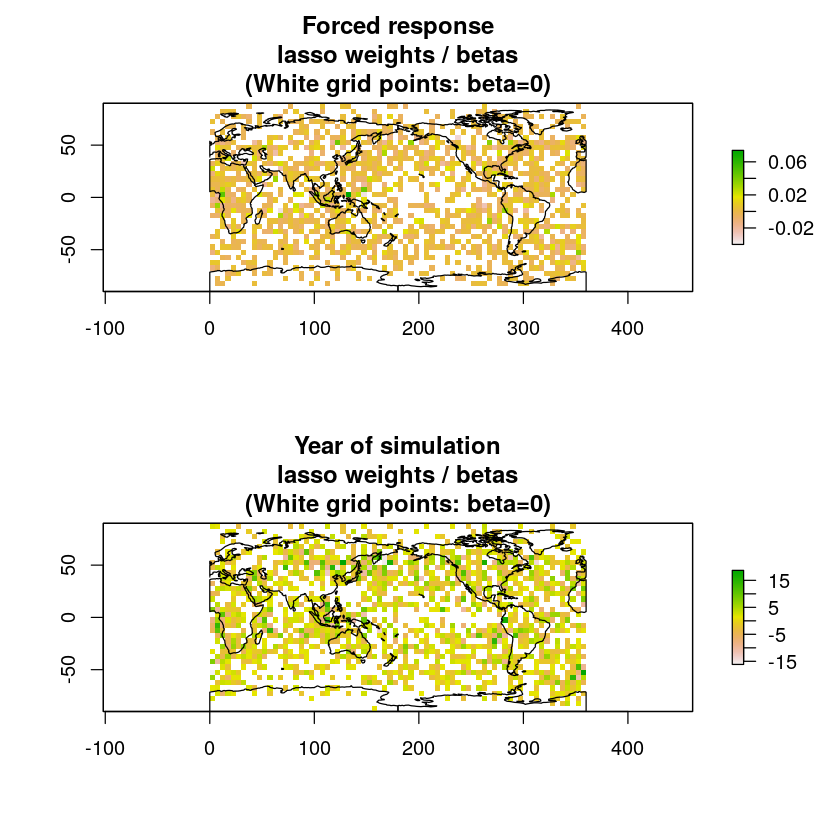

In [90]:
## Visualize predictor subsets
par(mfrow=c(2,1))

plot.lasso.fraw.coef <- raster.template
values(plot.lasso.fraw.coef) = as.matrix(coef(lasso.fraw, lasso.fraw$lasso.min)[2:2593,length(lambda_seq)])
values(plot.lasso.fraw.coef)[abs(values(plot.lasso.fraw.coef))<cut_fraw] <- NA

plot(plot.lasso.fraw.coef, main="Forced response\nlasso weights / betas\n(White grid points: beta=0)")
lines(land.polygon)

plot.lasso.year.coef <- raster.template
values(plot.lasso.year.coef) = as.matrix(coef(lasso.year, lasso.year$lasso.min)[2:2593,length(lambda_seq)])
values(plot.lasso.year.coef)[abs(values(plot.lasso.year.coef))<cut_year] <- NA

plot(plot.lasso.year.coef, main="Year of simulation\nlasso weights / betas\n(White grid points: beta=0)")
lines(land.polygon)


In [91]:
# Training setup 
B   <- 2500
d   <- 4
lmd <- 0.01
cvf <- 5

In [92]:
## Training and saving models
# Forced response
# fit.fraw <- gbm(y ~ .,
#                 data = data.frame(y = Y1_train, X = X_train[,fraw.ind]),
#                 distribution = 'gaussian',
#                 n.tree=B,
#                 interaction.depth=d,
#                 shrinkage=lmd,
#                 bag.fraction=1,
#                 cv=cvf)
# 
# saveRDS(fit.fraw, paste0("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/bt.cv.fraw_CSIsplit", "_subset_cut", cut_fraw, "_B", B, "_d", d, "_lmd", lmd, "_cv", cvf, ".rds"))

In [93]:
# Year of simulation
# fit.year <- gbm(y ~ .,
#                 data = data.frame(y = Y2_train, X = X_train[,year.ind]),
#                 distribution = 'gaussian',
#                 n.tree=B,
#                 interaction.depth=d,
#                 shrinkage=lmd,
#                 bag.fraction=1,
#                 cv=cvf)
# 
# saveRDS(fit.year, paste0("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/bt.cv.year_CSIsplit", "_subset_cut", cut_year, "_B", B, "_d", d, "_lmd", lmd, "_cv", cvf, ".rds"))

## Non-linear Model - Evaluation

### Find best model

In [94]:
## Print all created models
all_mods <- list.files("./output/", pattern = "CSI")
all_mods <- all_mods[grep(pattern = "bt", all_mods)]
all_year <- all_mods[grep(pattern = "year", all_mods)]
all_fraw <- all_mods[grep(pattern = "fraw", all_mods)]

#print("Year Models")
#print(all_year)
#print("Fraw Models")
#print(all_fraw)
#print("************************************************")

l <- max(length(all_year), length(all_fraw))

## Loop over all models
df_fraw <- tibble(file = rep(NA, l))
df_year <- tibble(file = rep(NA, l))

for (i in 1:length(all_fraw)){
    
    if (file.exists(paste0("./output/", all_fraw[i]))){
        ## Load Models
        fit.fraw <- readRDS(paste0("./output/", all_fraw[i]))

        ## Get best n.tree
        best.n.tree.fraw <- gbm.perf(fit.fraw, method="cv", plot.it=F)

        ## Make predictions and get metrics:
        fraw_bt_pred <- predict(fit.fraw, data.frame(y=Y1_test, X=X_test), n.tree=best.n.tree.fraw)
        fraw_bt_MSE = MSE(obs = Y1_test, sim = fraw_bt_pred)
        fraw_bt_R2 = cor(Y1_test, fraw_bt_pred) ^ 2

        df_fraw$file[i]   <- paste0(all_fraw[i])
        df_fraw$best_b[i] <- best.n.tree.fraw
        df_fraw$r2[i]     <- fraw_bt_R2
        df_fraw$mse[i]    <- fraw_bt_MSE
    } else {
        df_fraw$file[i]   <- NA
        df_fraw$best_b[i] <- NA
        df_fraw$r2[i]     <- NA
        df_fraw$mse[i]    <- NA
    }
    
    if (file.exists(paste0("./output/", all_year[i]))){
        fit.year <- readRDS(paste0("./output/", all_year[i]))
        best.n.tree.year <- gbm.perf(fit.year, method="cv", plot.it=F)
        year_bt_pred = predict(fit.year, data.frame(y=Y2_test, X=X_test), n.tree=best.n.tree.year)
        year_bt_MSE = MSE(obs = Y2_test, sim = year_bt_pred)
        year_bt_R2 = cor(Y2_test, year_bt_pred) ^ 2

        df_year$file[i]   <- paste0(all_year[i])
        df_year$best_b[i] <- best.n.tree.year
        df_year$r2[i]     <- year_bt_R2
        df_year$mse[i]    <- year_bt_MSE
    } else {
        df_year$file[i]   <- NA
        df_year$best_b[i] <- NA
        df_year$r2[i]     <- NA
        df_year$mse[i]    <- NA
    }
}

## Print it

df_fraw %>% arrange(r2)
df_year %>% arrange(r2)

Warning message:
“Unknown or uninitialised column: `best_b`.”
Warning message:
“Unknown or uninitialised column: `r2`.”
Warning message:
“Unknown or uninitialised column: `mse`.”
Warning message:
“Unknown or uninitialised column: `best_b`.”
Warning message:
“Unknown or uninitialised column: `r2`.”
Warning message:
“Unknown or uninitialised column: `mse`.”


file,best_b,r2,mse
<chr>,<int>,<dbl>,<dbl>
bt.cv.fraw_CSIsplit_subset_cut0.0075_B5000_d5_lmd0.001_cv10.rds,5000,0.8934565,0.013473321
bt.cv.fraw_CSIsplit_subset_cut0.004_B5000_d5_lmd0.001_cv5.rds,5000,0.8948986,0.013598565
bt.cv.fraw_CSIsplit_subset_perc20.8_B5000_d5_lmd0.001_cv5.rds,5000,0.8954496,0.013477937
bt.cv.fraw_CSIsplit_subset_cut0_B2500_d4_lmd0.01_cv5.rds,2500,0.9201336,0.009745286
bt.cv.fraw_CSIsplit_subset_cut5e-04_B5000_d4_lmd0.01_cv10.rds,5000,0.9231299,0.009262982
bt.cv.fraw_CSIsplit_10CV_B5000_d4_lmd0.01.rds,4999,0.9237798,0.009218658
bt.cv.fraw_CSIsplit_subset_cut0.0025_B10000_d4_lmd0.01_cv10.rds,10000,0.9256583,0.008894682
bt.cv.fraw_CSIsplit_subset_cut0_B50000_d1_lmd0.1_cv5.rds,11235,0.9259143,0.008803334


file,best_b,r2,mse
<chr>,<int>,<dbl>,<dbl>
bt.cv.year_CSIsplit_subset_cut0.35_B5000_d4_lmd0.001_cv10.rds,5000,0.6968858,893.5677
bt.cv.year_CSIsplit_subset_cut0.35_B5000_d5_lmd0.01_cv10.rds,4999,0.7049811,870.3651
bt.cv.year_CSIsplit_subset_cut1.45_B5000_d4_lmd0.01_cv10.rds,5000,0.7070839,860.4444
bt.cv.year_CSIsplit_subset_cut1.45_B5000_d4_lmd0.01_cv5.rds,5000,0.7070839,860.4444
bt.cv.year_CSIsplit_subset_cut0_B2500_d4_lmd0.01_cv5.rds,2500,0.7135341,849.8462
bt.cv.year_CSIsplit_subset_cut0.35_B5000_d4_lmd0.01_cv10.rds,4999,0.7149402,841.9699
NA,NA,NA,NA
NA,NA,NA,NA



 TARGET FRAW -------------------- 
Best model file:  bt.cv.fraw_CSIsplit_subset_cut0_B50000_d1_lmd0.1_cv5.rds 
Highest R2 = Lowest MSE?:  TRUE 
Optimal number of trees:  11235 

 TARGET YEAR -------------------- 
Best model file:  bt.cv.year_CSIsplit_subset_cut0.35_B5000_d4_lmd0.01_cv10.rds 
Highest R2 = Lowest MSE?:  TRUE 
Optimal number of trees:  4999 


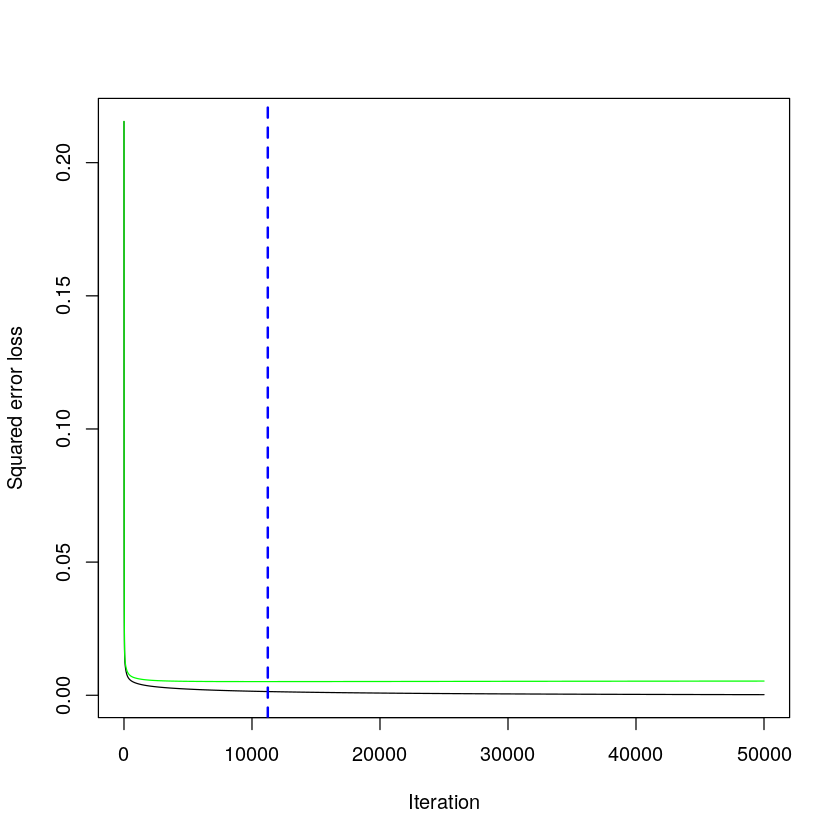


 PREDICTIONS -------------------- 


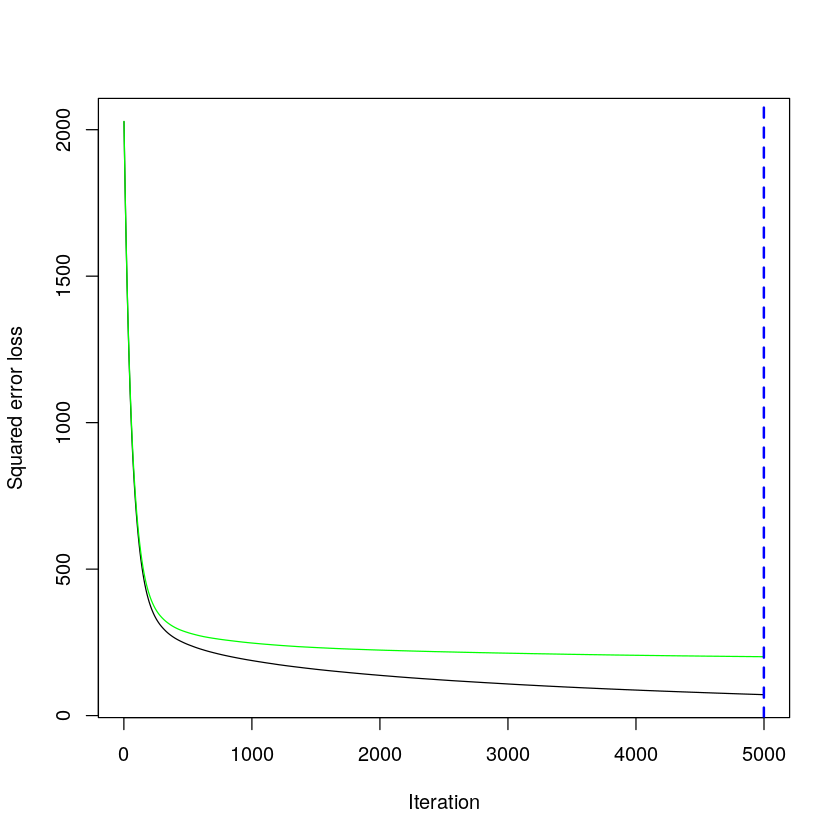

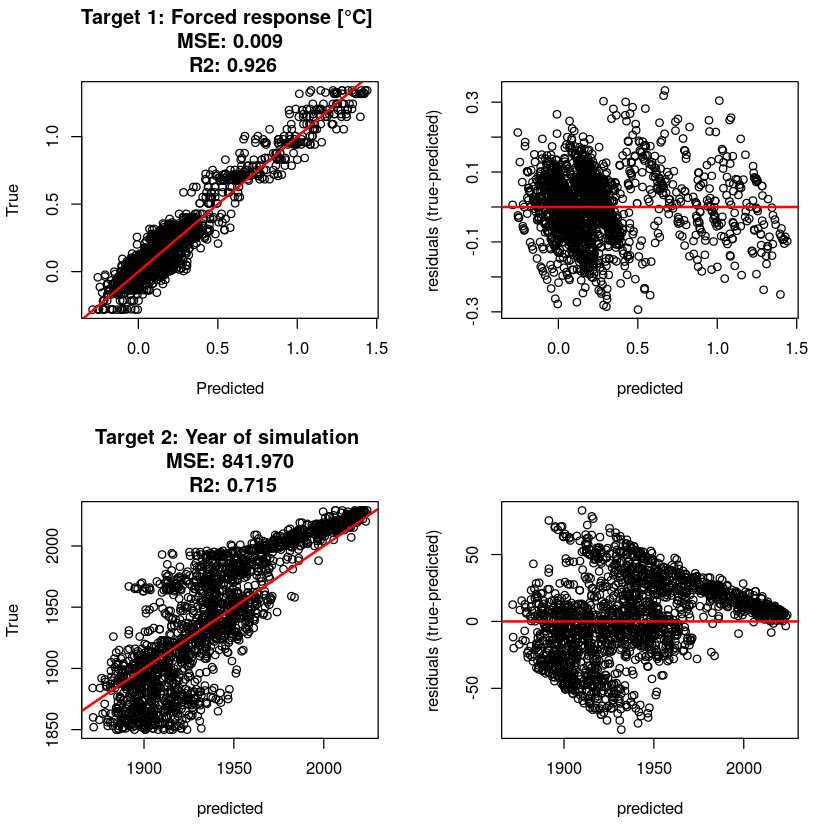

In [95]:
## Load best models
file_best_fraw <- df_fraw %>% top_n(1, r2) %>% pull(file)
fit.fraw <- readRDS(paste0("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/", file_best_fraw))

file_best_year <- df_year %>% top_n(1, r2) %>% pull(file)
fit.year <- readRDS(paste0("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/", file_best_year))

# Find optimal number of trees
best.n.tree.fraw <- gbm.perf(fit.fraw, method="cv", plot.it = F)
best.n.tree.year <- gbm.perf(fit.year, method="cv", plot.it = F)

# Predictions
fraw_pred <- predict(fit.fraw, data.frame(y=Y1_test, X=X_test), n.tree=best.n.tree.fraw)
fraw_MSE = MSE(obs = Y1_test, sim = fraw_pred)
fraw_R2 = cor(Y1_test, fraw_pred) ^ 2

year_pred = predict(fit.year, data.frame(y=Y2_test, X=X_test), n.tree=best.n.tree.year)
year_MSE = MSE(obs = Y2_test, sim = year_pred)
year_R2 = cor(Y2_test, year_pred) ^ 2

## Show Outputs -> CV Plots are messy, they do not appear in order they are called. First one is for FRAW and second for YEAR
## Check if highest r2 is lowest mse
cat("\n TARGET FRAW -------------------- \n")
cat("Best model file: ", file_best_fraw, "\n")
cat("Highest R2 = Lowest MSE?: ", df_fraw %>% top_n(1, r2) %>% pull(file) == df_fraw %>% top_n(-1, mse) %>% pull(file), "\n")
cat("Optimal number of trees: ", best.n.tree.fraw, "\n")
best.n.tree.fraw <- gbm.perf(fit.fraw, method="cv", plot.it = T)


cat("\n TARGET YEAR -------------------- \n")
cat("Best model file: ", file_best_year, "\n")
cat("Highest R2 = Lowest MSE?: ", df_fraw %>% top_n(1, r2) %>% pull(file) == df_fraw %>% top_n(-1, mse) %>% pull(file), "\n")
cat("Optimal number of trees: ", best.n.tree.year, "\n")
best.n.tree.year <- gbm.perf(fit.year, method="cv", plot.it = T)

# Visualize the prediction
cat("\n PREDICTIONS -------------------- \n")
par(mfrow=c(2,2))
plot(fraw_pred, Y1_test, xlab = "Predicted", ylab = "True", main = paste("Target 1: Forced response [°C]", sprintf("\n MSE: %.3f", fraw_MSE), sprintf("\n R2: %.3f", fraw_R2)))
abline(0, 1, col = "red", lwd = 2)
plot(fraw_pred, Y1_test - fraw_pred, xlab = "predicted", ylab = "residuals (true-predicted)")
abline(0, 0, col = "red", lwd = 2)

plot(year_pred, Y2_test , xlab = "predicted", ylab = "True", main = paste( "Target 2: Year of simulation", sprintf("\n MSE: %.3f", year_MSE), sprintf("\n R2: %.3f", year_R2)))
abline(0, 1, col = "red", lwd = 2)
plot(year_pred, Y2_test - year_pred, xlab = "predicted", ylab = "residuals (true-predicted)")
abline(0, 0, col = "red", lwd = 2)


# Notes and Insights
- Taking more parameters (20 instead of 10%) massively increases computation time but does not improve predictions (at least for Target 1)

# Make predictions for final best model

## For $F_T$

In [96]:
## Load Model -> CSI LASSO

# Data Split needed
## Getting all information into one dataframe to make selection and filtering easier
names_x  <- names(LENS_tas_ann_train$X %>% as_tibble())         # Get names of tibble variables for selection below
df_tmp   <- bind_cols(tibble(fraw = LENS_tas_ann_train$Y$fraw,  # Get vector for fraw
                             year = LENS_tas_ann_train$Y$year), # Get vector for year
                      LENS_tas_ann_train$X %>% as_tibble(),     # Get raster data
                      LENS_tas_ann_train$M %>% as_tibble() %>% dplyr::select(-year)) # Get meta data (drop year because confusion with target metric "year")

df_train <- df_tmp %>% dplyr::filter(modcl != "CSI")
X_train  <- df_train %>% dplyr::select(all_of(names_x)) %>% as.matrix()
Y1_train <- df_train %>% dplyr::filter(modcl != "CSI") %>% dplyr::select(fraw) %>% rename(y = fraw) %>% as.matrix()

## Run Model
lambda_seq <- 10^seq(-6, 2, length.out = 50)     
lasso.cv.fraw <- readRDS("~/IAC_lectures//2021_HS/SLAC//GroupProject/output/lasso.cv.fraw_CSIsplit_10CV_50lambda.rds")
lasso.fraw <- glmnet(x = X_train, y = Y1_train, family = "gaussian", alpha = 1, standardize = T, lambda = lambda_seq)
lambda.fraw <- lasso.cv.fraw$lambda.min
fraw_pred <- predict(lasso.fraw, s = lambda.fraw, LENS_tas_ann_test$X)

## For $F_Y$

In [97]:
fit.year <- readRDS("./output/bt.cv.year_CSIsplit_subset_cut0_B2500_d4_lmd0.01_cv5.rds")
best.n.tree.year <- gbm.perf(fit.year, method="cv", plot.it = F)

# Have to get names of variables in fit.year data
df <- as.data.frame(fit.year$data$x.order)
colnames(LENS_tas_ann_test$X) <- names(df)

year_pred <- predict(fit.year, as.data.frame(x=LENS_tas_ann_test$X), n.tree=best.n.tree.year)

## Save predictions

In [99]:
# save my predictions:
save(fraw_pred, year_pred, file = "group8.prediction.RData")

# Testing different models for "CSI"-approach

In [ ]:
models <- c('Can', 'CES', 'CSI', 'EC-', 'GFD', 'MPI')

for (i in models) {
    cat("\n
        ****************************************************************************** \n",
        i,"
        ****************************************************************************** \n")  
    lasso.cv.fraw <- readRDS(paste0("./output/lasso.cv.fraw_", i,"split_10CV_50lambda.rds"))
    lasso.cv.year <- readRDS(paste0("./output/lasso.cv.year_", i,"split_10CV_50lambda.rds"))
    
    # Identifying best lambda
    lambda.fraw <- lasso.cv.fraw$lambda.min
    lambda.year <- lasso.cv.year$lambda.min

    sprintf("lambda.fraw: %s", lambda.fraw)
    sprintf("lambda.year: %s", lambda.year)

    # Fit to LASSO
    lasso.fraw = glmnet(x = X_train,
                        y = Y1_train,
                        family = "gaussian",
                        alpha = 1,
                        standardize = T,
                        lambda = lambda_seq)

    lasso.year = glmnet(x = X_train,
                        y = Y2_train,
                        family = "gaussian",
                        alpha = 1,
                        standardize = T,
                        lambda = lambda_seq)

        # Prediction
    fraw_pred = predict(lasso.fraw, s = lambda.fraw, X_test)
    fraw_MSE = MSE(obs = Y1_test, sim = fraw_pred)
    fraw_R2 = cor(Y1_test, fraw_pred) ^ 2

    year_pred = predict(lasso.year, s = lambda.year, X_test)
    year_MSE = MSE(obs = Y2_test, sim = year_pred)
    year_R2 = cor(Y2_test, year_pred) ^ 2

    # Visualize the prediction
    jpeg(paste0("./fig/feature_map_linear_", i, ".jpg"))
    par(mfrow=c(2,2))
    plot(fraw_pred, Y1_test, xlab = "Predicted", ylab = "True", main = paste("Target 1: Forced response [°C]", sprintf("\n MSE: %.3f", fraw_MSE), sprintf("\n R2: %.3f", fraw_R2)))
    abline(0, 1, col = "red", lwd = 2)
    plot(fraw_pred, Y1_test - fraw_pred, xlab = "predicted", ylab = "residuals (true-predicted)")
    abline(0, 0, col = "red", lwd = 2)

    plot(year_pred, Y2_test , xlab = "predicted", ylab = "True", main = paste( "Target 2: Year of simulation", sprintf("\n MSE: %.3f", year_MSE), sprintf("\n R2: %.3f", year_R2)))
    abline(0, 1, col = "red", lwd = 2)
    plot(year_pred, Y2_test - year_pred, xlab = "predicted", ylab = "residuals (true-predicted)")
    abline(0, 0, col = "red", lwd = 2)
    dev.off()

    # Visualize the features maps
    jpeg(paste0("./fig/predictions_linear_", i, ".jpg"))
    par(mfrow=c(2,1))

    plot.lasso.fraw.coef <- raster.template
    values(plot.lasso.fraw.coef) = as.matrix(coef(lasso.fraw, lasso.fraw$lasso.min)[2:2593,length(lambda_seq)])
    values(plot.lasso.fraw.coef)[values(plot.lasso.fraw.coef)==0] <- NA

    plot(plot.lasso.fraw.coef, main="Forced response\nlasso weights / betas\n(White grid points: beta=0)")
    lines(land.polygon)

    plot.lasso.year.coef <- raster.template
    values(plot.lasso.year.coef) = as.matrix(coef(lasso.year, lasso.year$lasso.min)[2:2593,length(lambda_seq)])
    values(plot.lasso.year.coef)[values(plot.lasso.year.coef)==0] <- NA

    plot(plot.lasso.year.coef, main="Year of simulation\nlasso weights / betas\n(White grid points: beta=0)")
    lines(land.polygon)
    dev.off()
            
    cat("FT: \n MSE = ",  fraw_MSE, "\n R2 = ", fraw_R2, "\n", 
        "FY: \n MSE = ",  year_MSE, "\n R2 = ", year_R2, "\n")
}



        ****************************************************************************** 
 Can 
        ****************************************************************************** 
FT: 
 MSE =  0.008865091 
 R2 =  0.9281232 
 FY: 
 MSE =  1778.611 
 R2 =  0.6424987 


        ****************************************************************************** 
 CES 
        ****************************************************************************** 
FT: 
 MSE =  0.008865091 
 R2 =  0.9281232 
 FY: 
 MSE =  1778.611 
 R2 =  0.6424987 


        ****************************************************************************** 
 CSI 
        ****************************************************************************** 
FT: 
 MSE =  0.009030712 
 R2 =  0.9268845 
 FY: 
 MSE =  1778.611 
 R2 =  0.6424987 


        ****************************************************************************** 
 EC- 
        ****************************************************************************** 
FT: 
 